In [3]:
import os

In [4]:
%pwd

'c:\\Users\\chana\\OneDrive\\Desktop\\MLStudy\\MLFlow\\research'

In [5]:
os.chdir("../") # same as cd..

In [6]:
%pwd

'c:\\Users\\chana\\OneDrive\\Desktop\\MLStudy\\MLFlow'

In [7]:
from dataclasses import dataclass
from pathlib import Path



# The dataclass decorator is used for automatically adding generated special methods such as __init__() and __repr__() to user-defined classes.
@dataclass(frozen=True)
class DataIngestionConfig:
    root_dir: Path
    source_URL: str
    local_data_file: Path
    unzip_dir: Path

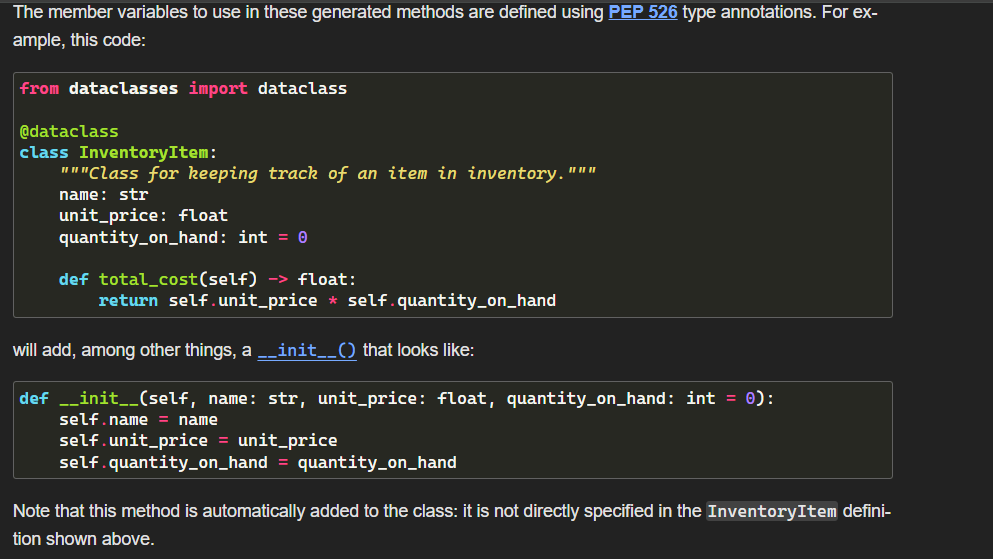

In [8]:
from src.cnnClassifier.constants import *
from src.cnnClassifier.utils.common import read_yaml, create_directories

In [10]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)

        create_directories([self.config.artifacts_root])


    
    def get_data_ingestion_config(self) -> DataIngestionConfig:
        config = self.config.data_ingestion

        create_directories([config.root_dir])

        data_ingestion_config = DataIngestionConfig(
            root_dir=config.root_dir,
            source_URL=config.source_URL,
            local_data_file=config.local_data_file,
            unzip_dir=config.unzip_dir 
        )

        return data_ingestion_config
      

In [12]:
import os
import zipfile
import gdown
from cnnClassifier import logger
from cnnClassifier.utils.common import get_size

In [15]:
class DataIngestion:
    def __init__(self, config: DataIngestionConfig):
        self.config = config

    def download_file(self)-> str:
        '''
        Fetch data from the url
        '''
        
        try: 
            dataset_url = self.config.source_URL
            zip_download_dir = self.config.local_data_file
            os.makedirs("artifacts/data_ingestion", exist_ok=True)
            logger.info(f"Downloading data from {dataset_url} into file {zip_download_dir}")

            file_id = dataset_url.split("/")[-2]
            prefix = 'https://drive.google.com/uc?/export=download&id='
            gdown.download(prefix+file_id,zip_download_dir)

            logger.info(f"Downloaded data from {dataset_url} into file {zip_download_dir}")

        except Exception as e:
            raise e
        
    
    def extract_zip_file(self):
        """
        zip_file_path: str
        Extracts the zip file into the data directory
        Function returns None
        """
        unzip_path = self.config.unzip_dir
        os.makedirs(unzip_path, exist_ok=True)
        with zipfile.ZipFile(self.config.local_data_file, 'r') as zip_ref:
            zip_ref.extractall(unzip_path)

In [16]:
try:
    config = ConfigurationManager()
    data_ingestion_config = config.get_data_ingestion_config()
    data_ingestion = DataIngestion(config=data_ingestion_config)
    data_ingestion.download_file()
    data_ingestion.extract_zip_file()
except Exception as e:
    raise e

[2024-02-22 00:11:38,908: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-02-22 00:11:38,915: INFO: common: yaml file: params.yaml loaded successfully]
[2024-02-22 00:11:38,918: INFO: common: created directory at: artifacts]
[2024-02-22 00:11:38,919: INFO: common: created directory at: artifacts/data_ingestion]
[2024-02-22 00:11:38,920: INFO: 3456511336: Downloading data from https://drive.google.com/file/d/1Umai3H4eEdyY5UMeQg3PLp7RkHEbKR1T/view?usp=sharing into file artifacts/data_ingestion/data.zip]


Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1Umai3H4eEdyY5UMeQg3PLp7RkHEbKR1T
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1Umai3H4eEdyY5UMeQg3PLp7RkHEbKR1T&confirm=t&uuid=8cb1cdc8-e283-4edd-b4c9-f1f7fb612b73
To: c:\Users\chana\OneDrive\Desktop\MLStudy\MLFlow\artifacts\data_ingestion\data.zip
100%|██████████| 49.0M/49.0M [00:02<00:00, 19.1MB/s]

[2024-02-22 00:11:43,312: INFO: 3456511336: Downloaded data from https://drive.google.com/file/d/1Umai3H4eEdyY5UMeQg3PLp7RkHEbKR1T/view?usp=sharing into file artifacts/data_ingestion/data.zip]
